In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("BlackFriday.csv ")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

# Analyzing Columns

In [6]:
df['User_ID'].nunique()

5891

In [7]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [8]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [11]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
df['Purchase'].sum()

5017668378

In [13]:
for i in df.columns:
    print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


In [14]:
for i in df.columns:
    print(i,":",df[i].unique())

User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
Marital_Status : [0 1]
Product_Category_1 : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product_Category_2 : [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 : [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase : [ 8370 15200  1422 ... 14539 11120 18426]


###  Analyze gender

In [15]:
df[df['Gender']=='M'].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686


In [16]:
{'Ratio' : [len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]}

{'Ratio': [405380, 132197]}

In [17]:
data=pd.DataFrame({'Ratio' : [len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])

<Axes: ylabel='Ratio'>

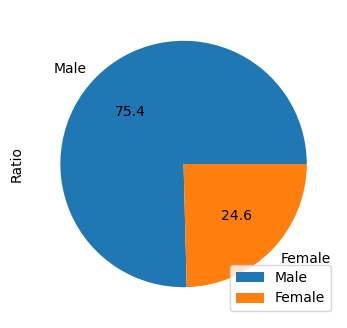

In [18]:
data.plot(y='Ratio',kind='pie',figsize=(4,4),autopct="%.1f")

In [19]:
len(df[df['Gender']=='M'])

405380

<Axes: title={'center': 'Gender ratio'}>

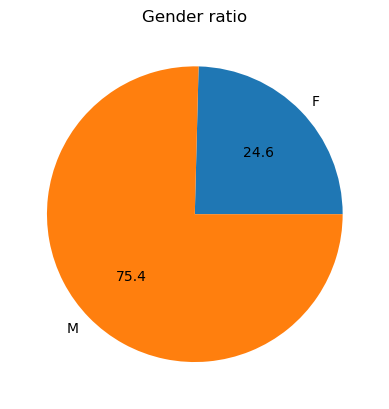

In [20]:
df.groupby('Gender').size().plot(kind='pie',autopct='%.1f',title='Gender ratio')

C:\Users\swarn\AppData\Local\Temp\ipykernel_5712\4254094190.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")


<Axes: ylabel='Purchase'>

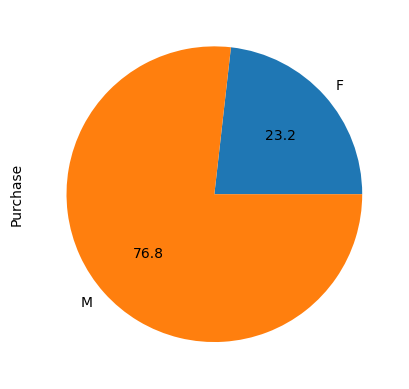

In [21]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

C:\Users\swarn\AppData\Local\Temp\ipykernel_5712\2306560720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct='%.1f')


<Axes: ylabel='Purchase'>

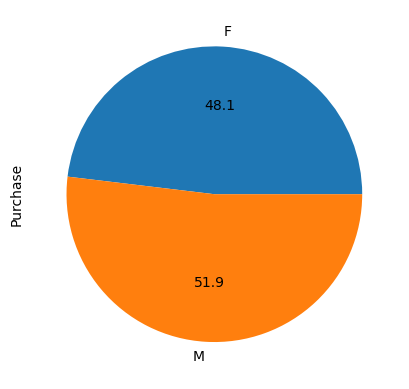

In [22]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct='%.1f')

# Analyze age and marrital status

In [23]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age', ylabel='Spendings'>

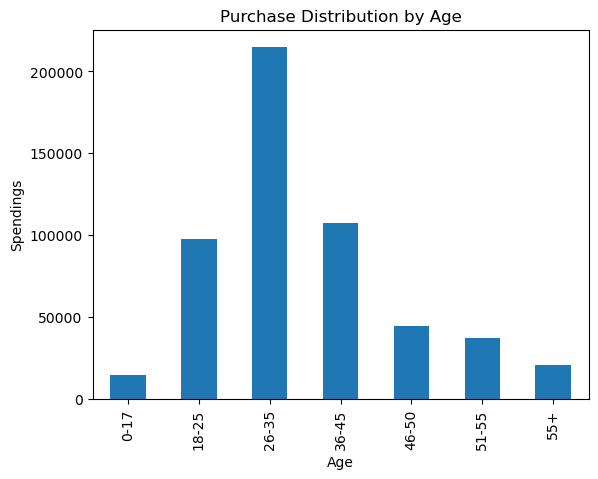

In [24]:
df.groupby('Age').size().plot(kind='bar',title ='Purchase Distribution by Age',xlabel='Age',ylabel='Spendings')

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age', ylabel='Spendings'>

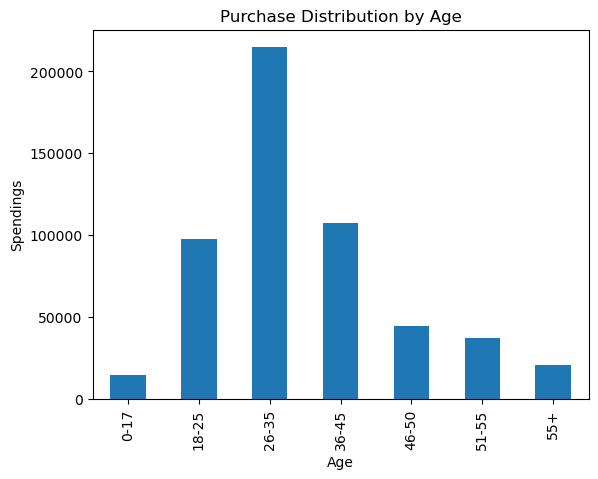

In [25]:
df.groupby('Age').size().plot(kind='bar',title ='Purchase Distribution by Age',xlabel='Age',ylabel='Spendings')

C:\Users\swarn\AppData\Local\Temp\ipykernel_5712\2207007577.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind='pie',autopct='%.1f')


<Axes: ylabel='Purchase'>

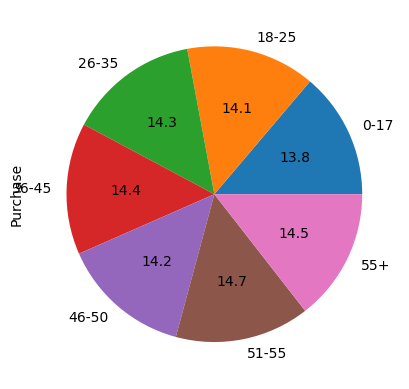

In [26]:
df.groupby('Age').mean()['Purchase'].plot(kind='pie',autopct='%.1f')

<Axes: >

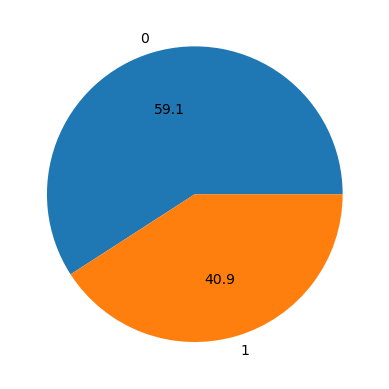

In [27]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%0.1f')

# Multi Column Analysis

<Axes: xlabel='Age', ylabel='count'>

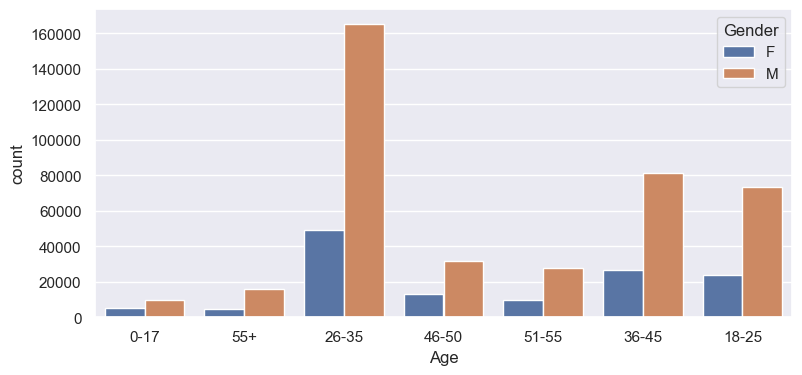

In [28]:
sns.set(rc={'figure.figsize' :(9,4)})
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

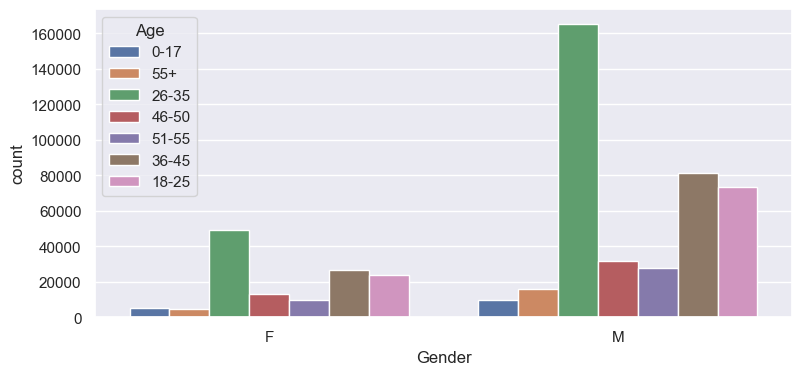

In [29]:
sns.set(rc={'figure.figsize' :(9,4)})
sns.countplot(x='Gender',hue='Age',data=df)

<Axes: xlabel='Gender', ylabel='count'>

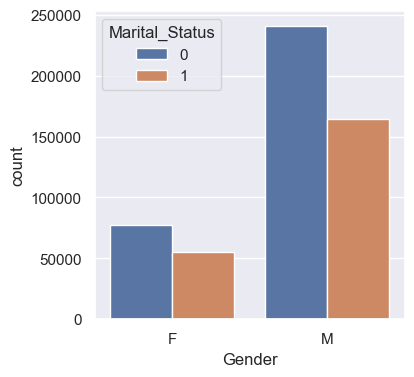

In [30]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: >

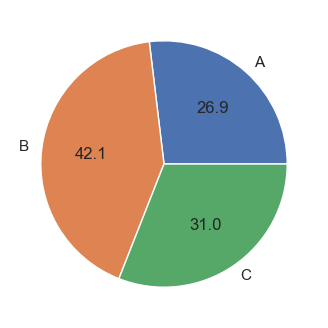

In [31]:
df.groupby("City_Category").size().plot(kind='pie',autopct='%.1f')

<Axes: xlabel='City_Category', ylabel='count'>

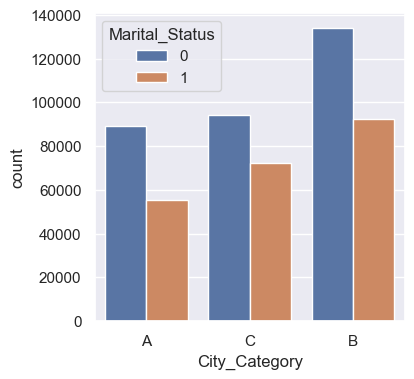

In [32]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x='City_Category',hue='Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

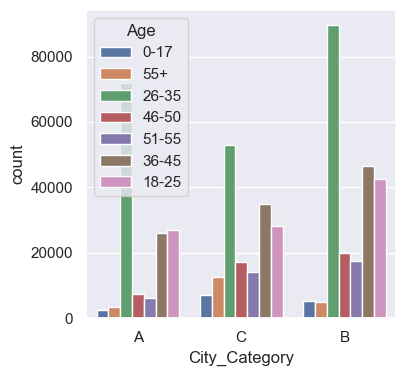

In [33]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

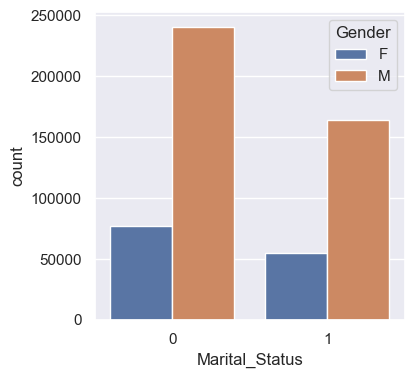

In [34]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x='Marital_Status',hue='Gender',data=df)

C:\Users\swarn\AppData\Local\Temp\ipykernel_5712\3497708650.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')


<Axes: ylabel='Purchase'>

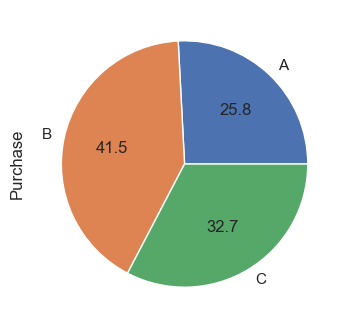

In [35]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

C:\Users\swarn\AppData\Local\Temp\ipykernel_5712\2399155030.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%.1f')


<Axes: ylabel='Purchase'>

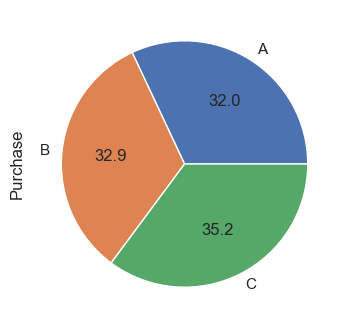

In [36]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

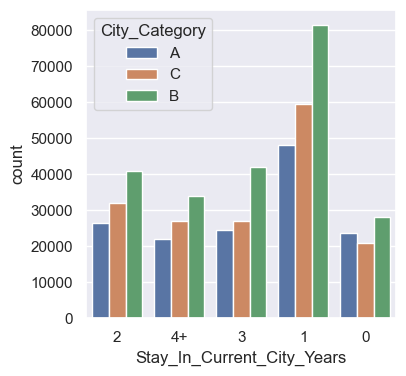

In [37]:
sns.countplot(x='Stay_In_Current_City_Years',hue='City_Category',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

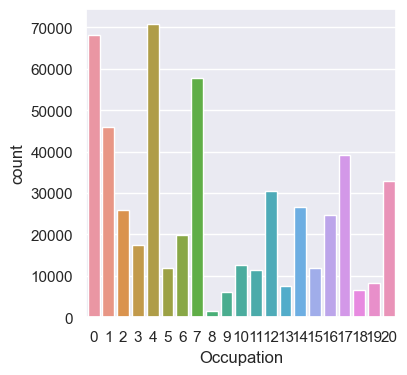

In [39]:
sns.countplot(x=df['Occupation'].sort_values())

C:\Users\swarn\AppData\Local\Temp\ipykernel_5712\4136626999.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].plot(kind='bar')


<Axes: xlabel='Occupation'>

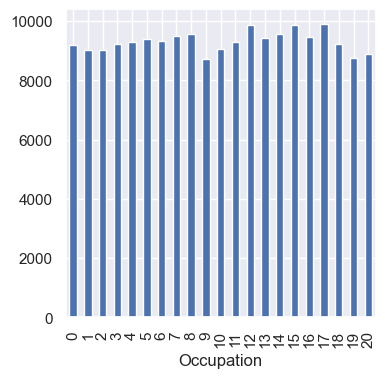

In [40]:
df.groupby('Occupation').mean()['Purchase'].plot(kind='bar')

<Axes: xlabel='Occupation'>

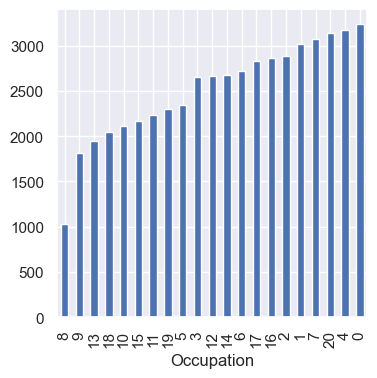

In [43]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

In [44]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<Axes: xlabel='Product_Category_1'>

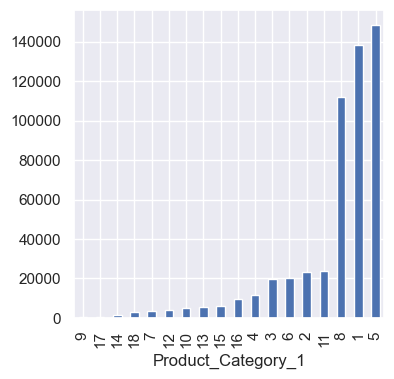

In [46]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

C:\Users\swarn\AppData\Local\Temp\ipykernel_5712\594745959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')


<Axes: xlabel='Product_Category_1'>

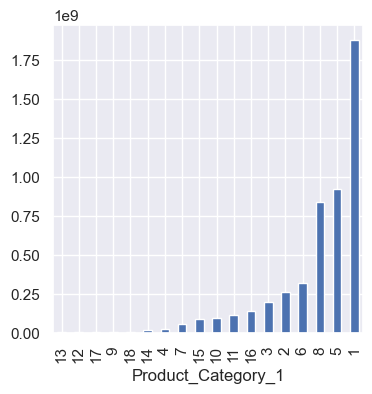

In [48]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

C:\Users\swarn\AppData\Local\Temp\ipykernel_5712\224135489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')


<Axes: xlabel='Product_Category_1'>

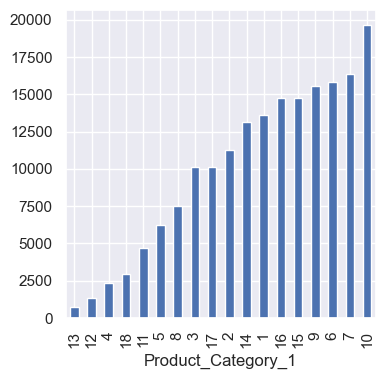

In [49]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')

# Combining age and marital status

In [50]:
list=[]
for i in range(len(df)):
    list.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
    
df['Marital_Gender']=list

In [51]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

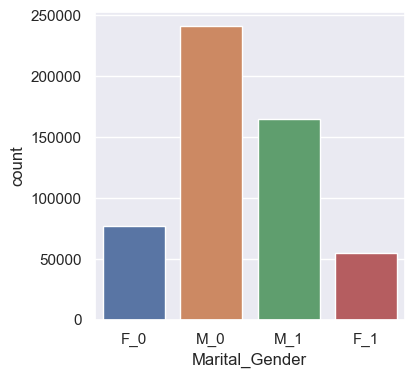

In [52]:
sns.countplot(x=df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

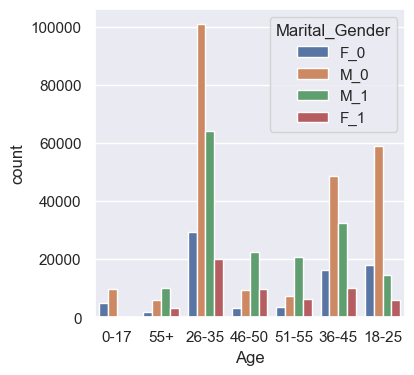

In [54]:
sns.countplot(x=df['Age'],hue=df['Marital_Gender'])